In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
app = pd.read_csv("/content/drive/MyDrive/Test Super/application_record.csv")
cred = pd.read_csv("/content/drive/MyDrive/Test Super/credit_record.csv")

In [ ]:
app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
app['ID'].duplicated().sum() #Check Dupliocates

47

In [ ]:
cred

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
cred['ID'].duplicated().sum() #Check Dupliocates

1002590

#Pre-Processing

In [ ]:
app.drop_duplicates(subset='ID',inplace=True) #Drop Duplicates

In [ ]:
app['ID'].duplicated().sum()

0

In [ ]:
cred.drop_duplicates(subset='ID',inplace=True) #Drop Duplicates

In [ ]:
cred['ID'].duplicated().sum()

0

In [ ]:
#Merge Data
merge = pd.merge(app,cred, how='inner', on='ID')

In [ ]:
merge

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,5
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,C
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,C
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,2


In [ ]:
#Check NaN Values
for col in merge.columns:
  print("kolom : {} memiliki NaN value sebanyak \
  {} dari {} row".format(col, 
                         str(merge[col].isna().sum()), 
                         str(len(merge.index))))

kolom : ID memiliki NaN value sebanyak   0 dari 36457 row
kolom : CODE_GENDER memiliki NaN value sebanyak   0 dari 36457 row
kolom : FLAG_OWN_CAR memiliki NaN value sebanyak   0 dari 36457 row
kolom : FLAG_OWN_REALTY memiliki NaN value sebanyak   0 dari 36457 row
kolom : CNT_CHILDREN memiliki NaN value sebanyak   0 dari 36457 row
kolom : AMT_INCOME_TOTAL memiliki NaN value sebanyak   0 dari 36457 row
kolom : NAME_INCOME_TYPE memiliki NaN value sebanyak   0 dari 36457 row
kolom : NAME_EDUCATION_TYPE memiliki NaN value sebanyak   0 dari 36457 row
kolom : NAME_FAMILY_STATUS memiliki NaN value sebanyak   0 dari 36457 row
kolom : NAME_HOUSING_TYPE memiliki NaN value sebanyak   0 dari 36457 row
kolom : DAYS_BIRTH memiliki NaN value sebanyak   0 dari 36457 row
kolom : DAYS_EMPLOYED memiliki NaN value sebanyak   0 dari 36457 row
kolom : FLAG_MOBIL memiliki NaN value sebanyak   0 dari 36457 row
kolom : FLAG_WORK_PHONE memiliki NaN value sebanyak   0 dari 36457 row
kolom : FLAG_PHONE memiliki Na

In [ ]:
merge.dropna(inplace=True) #Drop Na

In [ ]:
for col in merge.columns:
  print("kolom : {} memiliki NaN value sebanyak \
  {} dari {} row".format(col, 
                         str(merge[col].isna().sum()), 
                         str(len(merge.index))))

kolom : ID memiliki NaN value sebanyak   0 dari 25134 row
kolom : CODE_GENDER memiliki NaN value sebanyak   0 dari 25134 row
kolom : FLAG_OWN_CAR memiliki NaN value sebanyak   0 dari 25134 row
kolom : FLAG_OWN_REALTY memiliki NaN value sebanyak   0 dari 25134 row
kolom : CNT_CHILDREN memiliki NaN value sebanyak   0 dari 25134 row
kolom : AMT_INCOME_TOTAL memiliki NaN value sebanyak   0 dari 25134 row
kolom : NAME_INCOME_TYPE memiliki NaN value sebanyak   0 dari 25134 row
kolom : NAME_EDUCATION_TYPE memiliki NaN value sebanyak   0 dari 25134 row
kolom : NAME_FAMILY_STATUS memiliki NaN value sebanyak   0 dari 25134 row
kolom : NAME_HOUSING_TYPE memiliki NaN value sebanyak   0 dari 25134 row
kolom : DAYS_BIRTH memiliki NaN value sebanyak   0 dari 25134 row
kolom : DAYS_EMPLOYED memiliki NaN value sebanyak   0 dari 25134 row
kolom : FLAG_MOBIL memiliki NaN value sebanyak   0 dari 25134 row
kolom : FLAG_WORK_PHONE memiliki NaN value sebanyak   0 dari 25134 row
kolom : FLAG_PHONE memiliki Na

In [ ]:
merge.drop(columns='ID',inplace=True) #Drop ID

In [ ]:
merge.info() #$Check Data Type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          25134 non-null  object 
 1   FLAG_OWN_CAR         25134 non-null  object 
 2   FLAG_OWN_REALTY      25134 non-null  object 
 3   CNT_CHILDREN         25134 non-null  int64  
 4   AMT_INCOME_TOTAL     25134 non-null  float64
 5   NAME_INCOME_TYPE     25134 non-null  object 
 6   NAME_EDUCATION_TYPE  25134 non-null  object 
 7   NAME_FAMILY_STATUS   25134 non-null  object 
 8   NAME_HOUSING_TYPE    25134 non-null  object 
 9   DAYS_BIRTH           25134 non-null  int64  
 10  DAYS_EMPLOYED        25134 non-null  int64  
 11  FLAG_MOBIL           25134 non-null  int64  
 12  FLAG_WORK_PHONE      25134 non-null  int64  
 13  FLAG_PHONE           25134 non-null  int64  
 14  FLAG_EMAIL           25134 non-null  int64  
 15  OCCUPATION_TYPE      25134 non-null 

In [ ]:
#Selecting Data Categorical
categorical_data = merge[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','STATUS']]

In [ ]:
#Serlecting Data Numerical
num_data= merge.drop(columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','STATUS'])

In [ ]:
num_data

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
2,0,112500.0,-21474,-1134,1,0,0,0,2.0,0
3,0,270000.0,-19110,-3051,1,0,1,1,1.0,0
4,0,270000.0,-19110,-3051,1,0,1,1,1.0,-22
5,0,270000.0,-19110,-3051,1,0,1,1,1.0,0
6,0,270000.0,-19110,-3051,1,0,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...
36452,0,315000.0,-17348,-2420,1,0,0,0,2.0,0
36453,0,157500.0,-12387,-1325,1,0,1,1,2.0,0
36454,0,157500.0,-12387,-1325,1,0,1,1,2.0,0
36455,0,283500.0,-17958,-655,1,0,0,0,2.0,0


In [ ]:
t_cat_data = pd.get_dummies(categorical_data) #Implement One Hot Encoding

In [ ]:
t_cat_data

,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
2,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
36453,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36454,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36455,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data_encoded = pd.concat([num_data,t_cat_data],axis=1) #Concat Dataframe

In [ ]:
data_encoded.reset_index(drop=True,inplace=True)

In [ ]:
data_encoded

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,0,112500.0,-21474,-1134,1,0,0,0,2.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,270000.0,-19110,-3051,1,0,1,1,1.0,-22,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,0,315000.0,-17348,-2420,1,0,0,0,2.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25130,0,157500.0,-12387,-1325,1,0,1,1,2.0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
25131,0,157500.0,-12387,-1325,1,0,1,1,2.0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
25132,0,283500.0,-17958,-655,1,0,0,0,2.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
scaler = StandardScaler()

Segmented Label With K-Means


In [ ]:
X_scaled = scaler.fit_transform(data_encoded)

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state=100)

In [ ]:
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=100)

In [ ]:
hasil = kmeans.fit(X_scaled)

In [ ]:
print(kmeans.labels_)

[1 0 0 ... 0 0 1]


In [ ]:
merge['Label'] = kmeans.labels_ #Insert K-Means Result to Dataframe

In [ ]:
merge

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Label
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,C,1
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,0,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,X,0
5,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C,0
6,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,5,1
36453,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,C,0
36454,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0,C,0
36455,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,2,0


In [ ]:
data_encoded['Label']=kmeans.labels_

In [ ]:
data_encoded

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,Label
0,0,112500.0,-21474,-1134,1,0,0,0,2.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,270000.0,-19110,-3051,1,0,1,1,1.0,-22,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,270000.0,-19110,-3051,1,0,1,1,1.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,0,315000.0,-17348,-2420,1,0,0,0,2.0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
25130,0,157500.0,-12387,-1325,1,0,1,1,2.0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25131,0,157500.0,-12387,-1325,1,0,1,1,2.0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25132,0,283500.0,-17958,-655,1,0,0,0,2.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


#Data Exploration

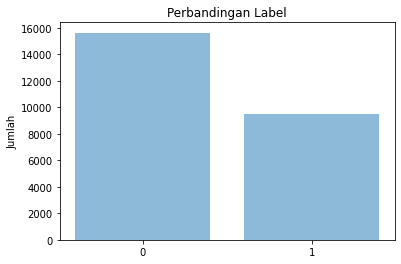

In [ ]:
#Check Imbalance Data
objects = ('0', '1')
y_pos = np.arange(len(objects))
performance = merge['Label'].value_counts()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jumlah')
plt.title('Perbandingan Label')
plt.savefig("/content/drive/MyDrive/hasil.png")
plt.show()

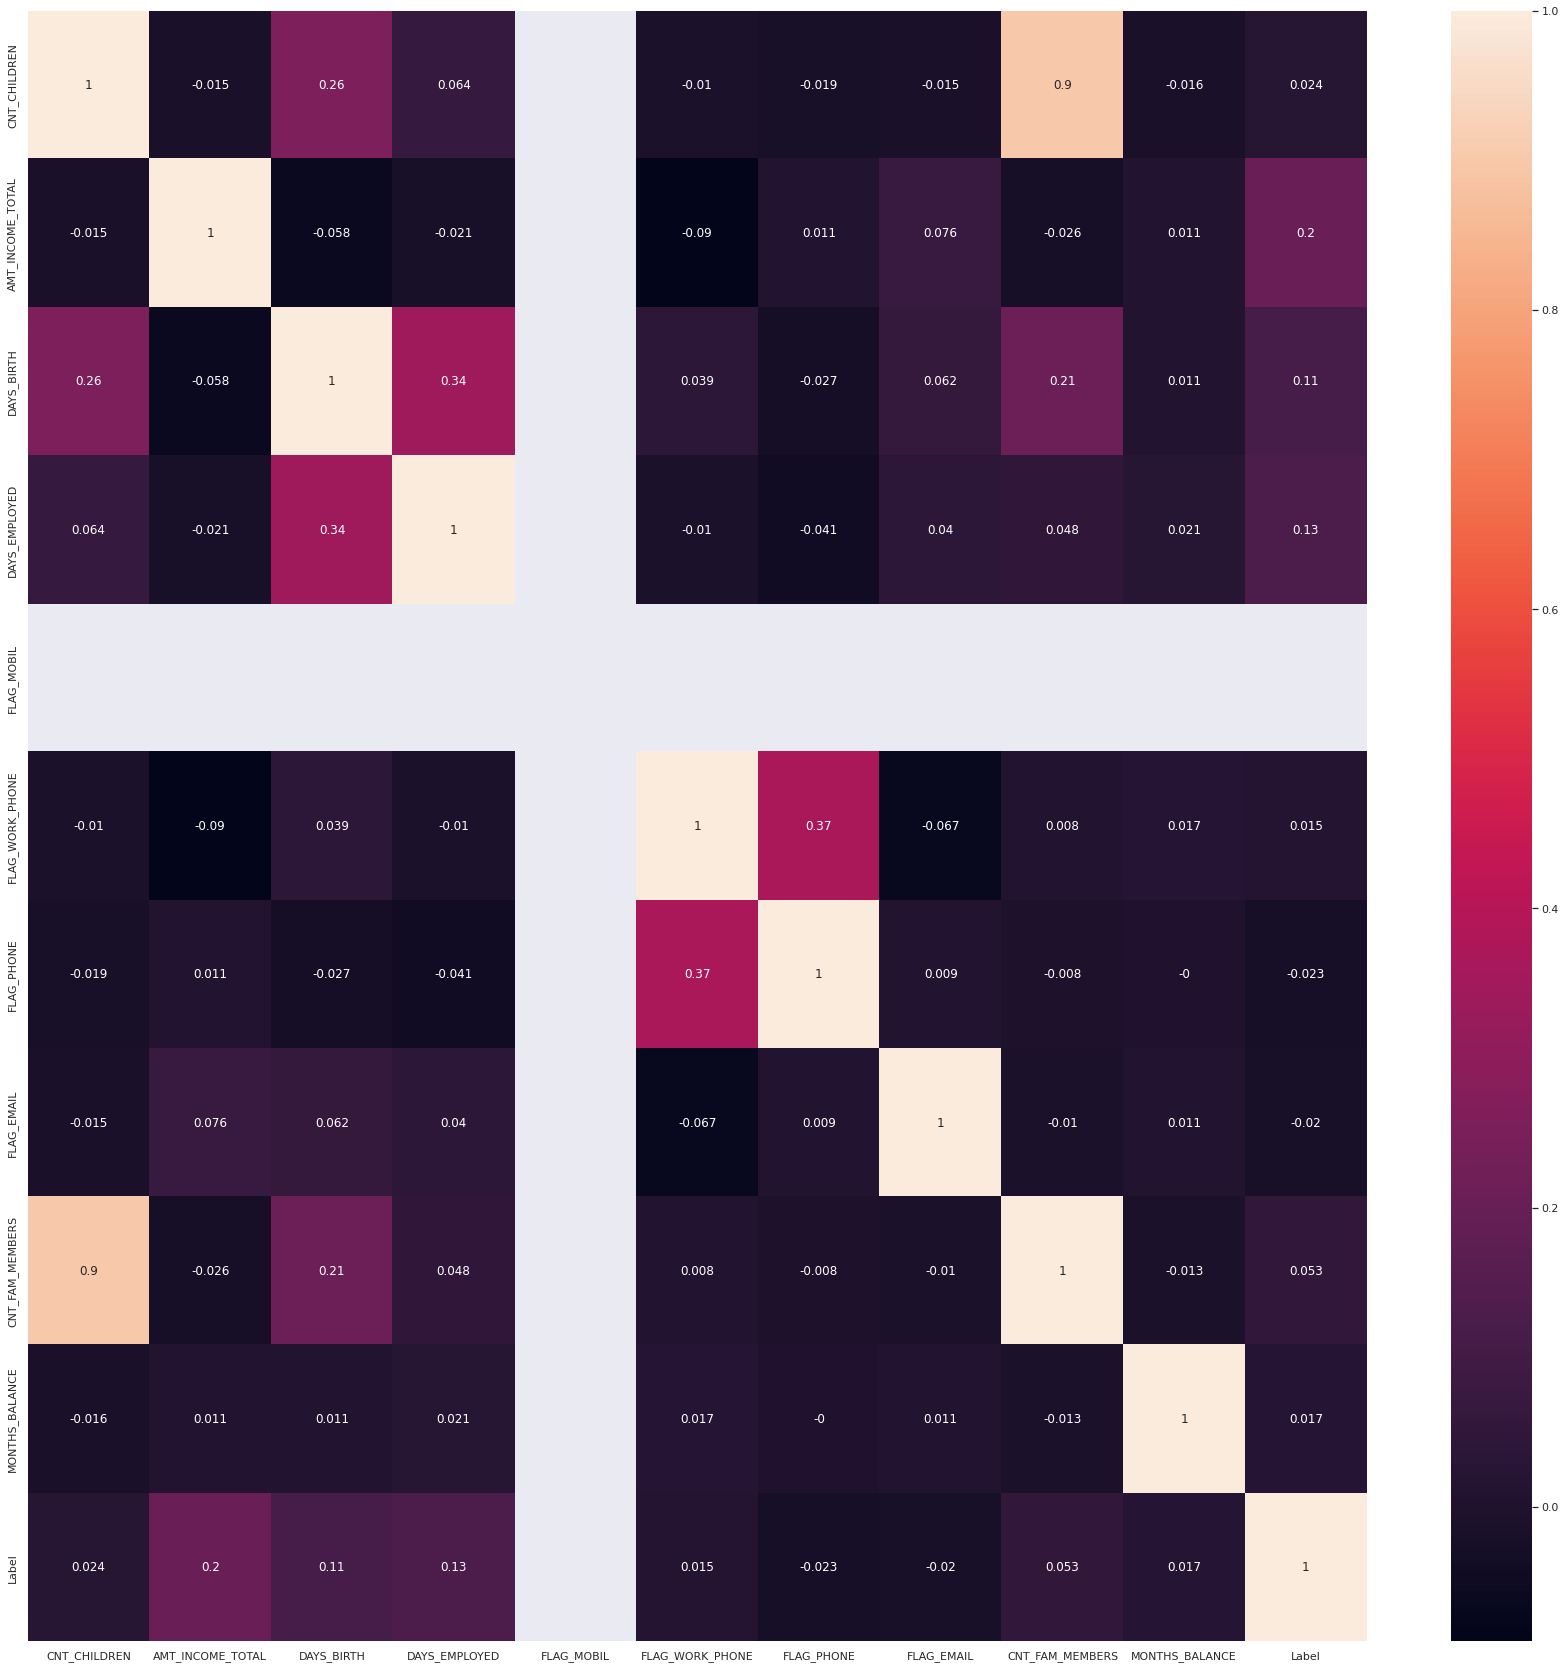

In [ ]:
#Check Correlation
sns.set(rc={'figure.figsize':(30,30)})
correlation_matrix = merge.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True, )
plt.show()

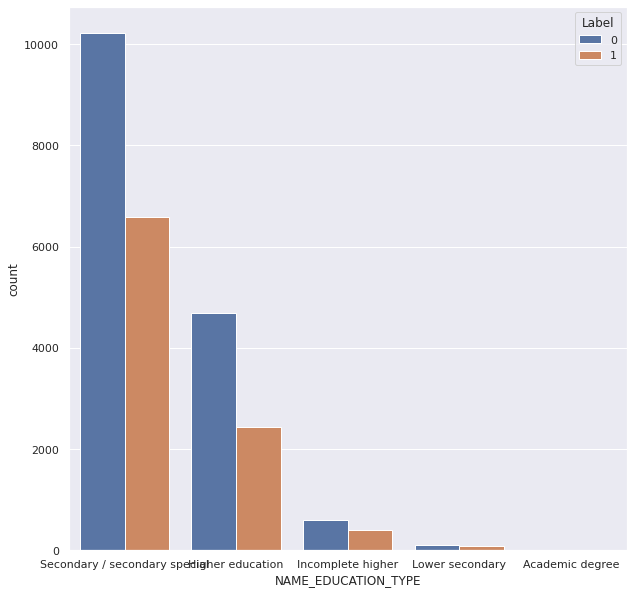

In [ ]:
#Count of Name Eduvstion Type
plt.figure(figsize=[10,10])
sns.countplot(x='NAME_EDUCATION_TYPE',hue='Label',data=merge)

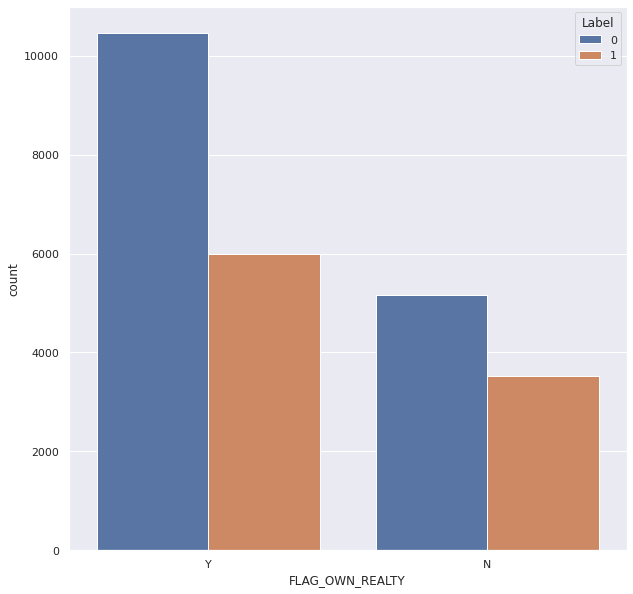

In [ ]:
#Count of Flag Own Realty
plt.figure(figsize=[10,10])
sns.countplot(x='FLAG_OWN_REALTY',hue='Label',data=merge)

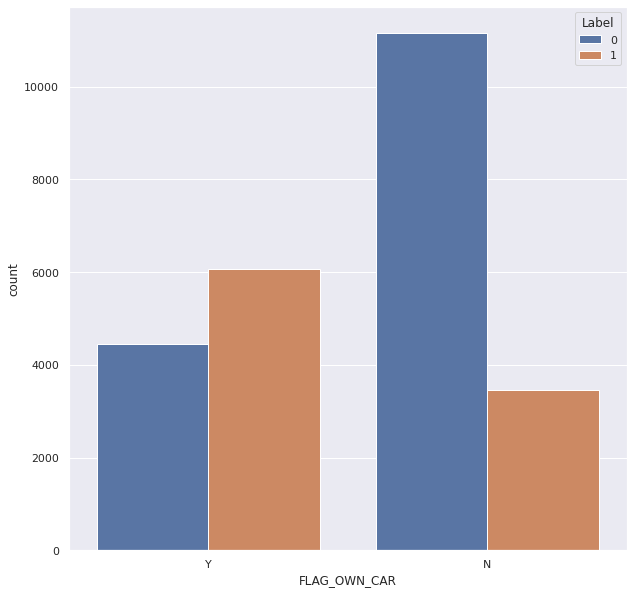

In [ ]:
#Count of Flag Own Car
plt.figure(figsize=[10,10])
sns.countplot(x='FLAG_OWN_CAR',hue='Label',data=merge)

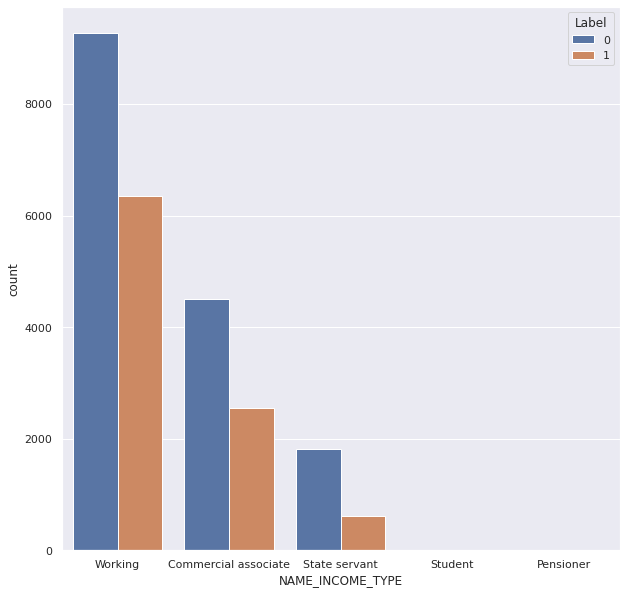

In [ ]:
#Count Of Income Type
plt.figure(figsize=[10,10])
sns.countplot(x='NAME_INCOME_TYPE',hue='Label',data=merge)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

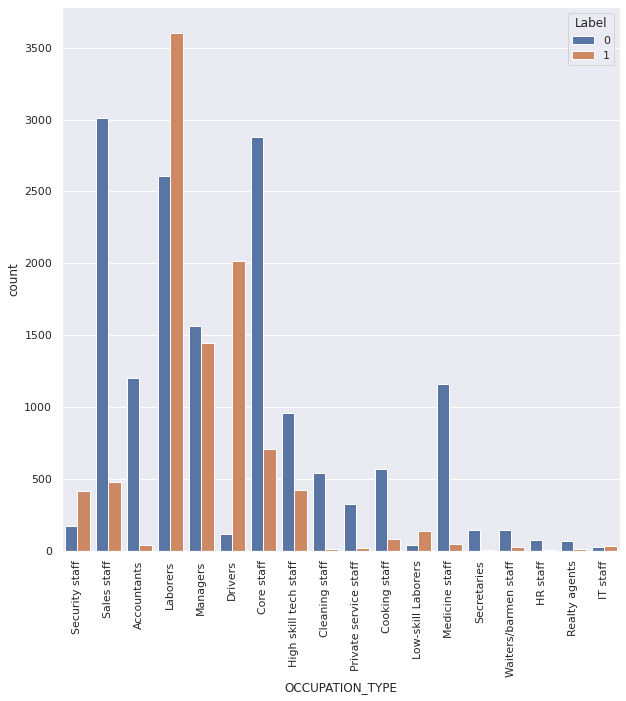

In [ ]:
#Count of Occupation Type
plt.figure(figsize=[10,10])
sns.countplot(x='OCCUPATION_TYPE',hue='Label',data=merge)
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9e9981e90>,
      dtype=object)

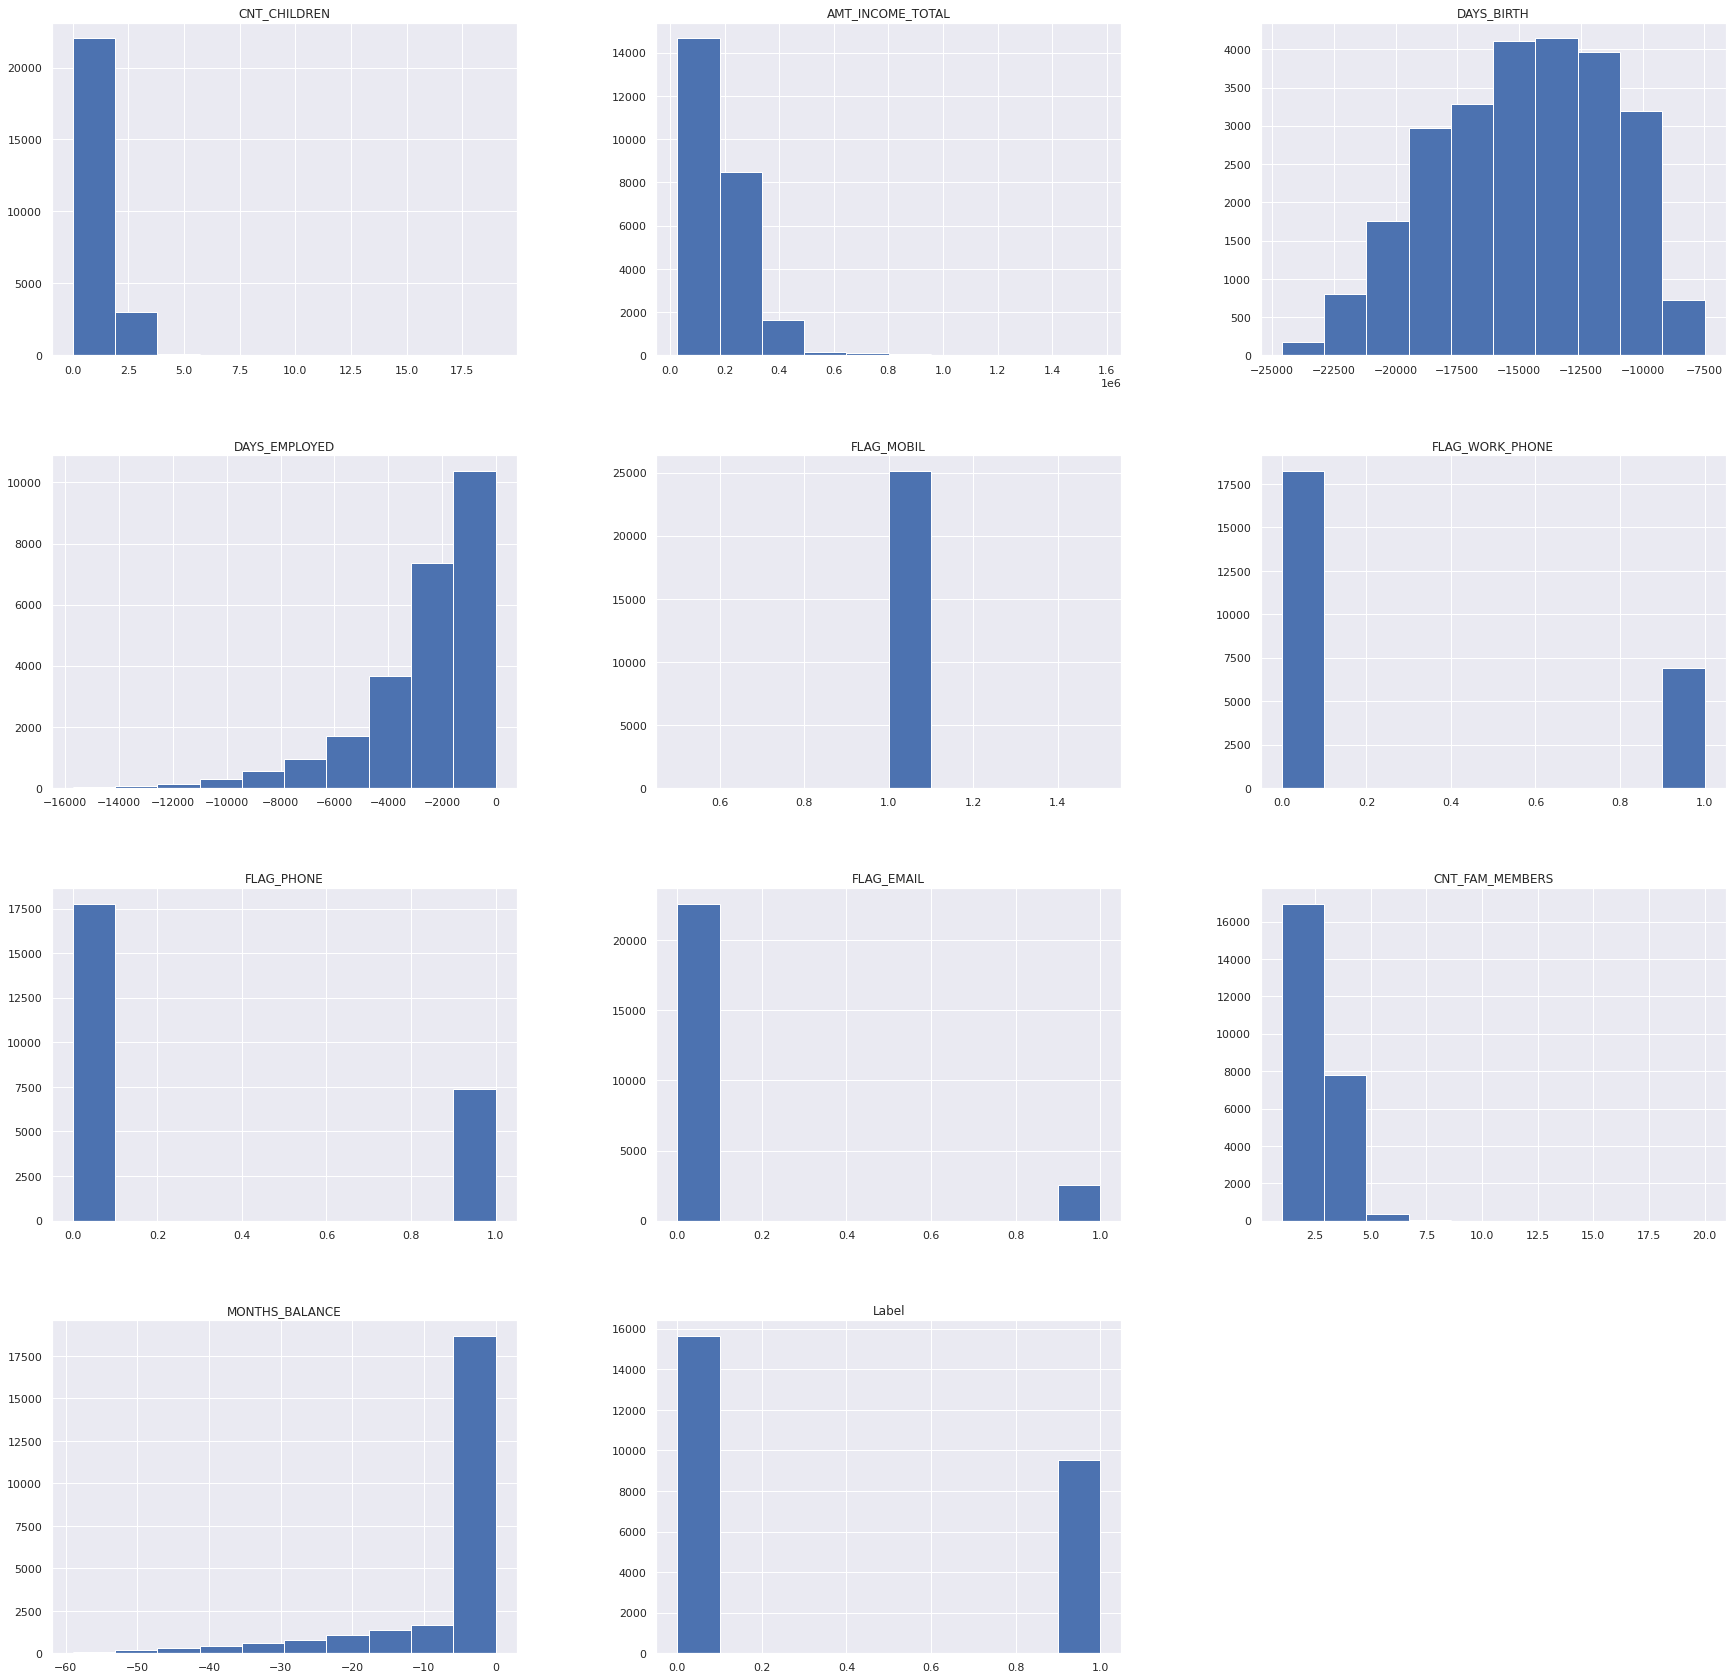

In [ ]:
merge.hist() #Histogram dataset

#Create Model

In [ ]:
#Separate Between Attribute and Label
X = data_encoded.iloc[:,:63].values
Y = data_encoded.iloc[:,63:].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split Data Into Data Test and Train
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB #Classification Using Gaussian Naive Bayes

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
pipeline = make_pipeline(QuantileTransformer(output_distribution='uniform'), GaussianNB()) #Create Pipeline

In [ ]:
pipeline.fit(x_train,y_train) #Train Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('quantiletransformer', QuantileTransformer()),
                ('gaussiannb', GaussianNB())])

In [ ]:
y_pred = pipeline.predict(x_test) #Test Model

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy using GNB: {0:0.4f}'. format(accuracy_score(y_test, y_pred))) #Test Result

Model accuracy using GNB: 0.9980
